In [1]:
import ocel
from IPython.display import display
from pprint import pprint
from ocel_features.util.multigraph import Relations, create_object_centric_graph, all_relations
from ocel_features.obj.object_situation import Targets, create_situations
from ocel_features.util.data_organization import Operators
from ocel_features.analysis.plot_graphs import show_graph_plt

0/39 events processed.
Graph done!


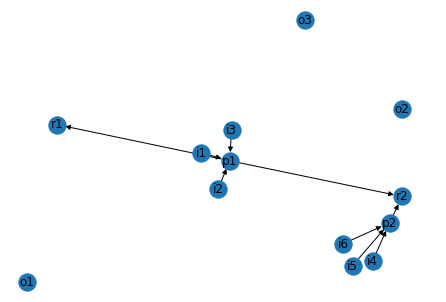

In [2]:
log = ocel.import_log('../logs/actual-min.jsonocel')
graph = create_object_centric_graph(log, {Relations.DESCENDANTS})
show_graph_plt(graph)

In [3]:
### All situation targets available
print([sit.name for sit in Targets])
### those with 'EVENT' at the start require event ids as the target input
### those with 'OBJECT' require object ids

['EVENTCHOICE', 'EVENTPROPERTY', 'EVENT_PROPERTY_UNKNOWN', 'EVENTWAIT', 'EVENT_DURATION', 'EVENTOBJECTCHOICE', 'EVENT_MISSING_REL', 'EVENT_MISSING_OT', 'OBJECTPROPERTY', 'OBJECTPROPERTYUNKNOWN', 'OBJECT_MISSING_ACTIVITY', 'OBJECTLIFETIME', 'OBJECT_MISSING_REACHABLE_OT', 'LINEAGE_PROPERTY_OP', 'TIMEWORKLOAD']


In [4]:
### giving nothing as the params gives us all the required params
### for the situation to be created
situations = create_situations(log, graph, 
                               log['ocel:events'], 
                               Targets.EVENTCHOICE, 
                               params=None)

Please provide parameters ['activities'] to use EVENTCHOICE.


In [5]:
### we require activity names that we want to analyse for the situation!
### let's compare what happens when a delivery is successful vs. not
params={'activities': {'failed delivery', 'deliver package'}}

situations = create_situations(log, graph, 
                               log['ocel:events'], 
                               Targets.EVENTCHOICE, 
                               params)
pprint(situations)

[Situation({'event choice': {0: 'failed delivery'}}),
 Situation({'event choice': {0: 'deliver package'}}),
 Situation({'event choice': {0: 'deliver package'}})]


In [6]:
### now with the target features and the behind the scenes
### to create situation features setup, we can create some to explore!
for s in situations:
    s.get_latest_ot_properties(ot = {'route'})
    s.get_op_ot_properties(ot = {'package'}, op = Operators.SUM)
    
    display(s._df)
    display(s._targetdf)
    

,att:route:latest:distance,att:route:latest:driver,att:route:latest:Destination,att:package:weight:SUM:,att:package:height:SUM:,att:package:width:SUM:
0,5000,Mike,123 Rue de Road,15,50,50


,event choice
0,failed delivery


,att:route:latest:distance,att:route:latest:driver,att:route:latest:Destination,att:package:weight:SUM:,att:package:height:SUM:,att:package:width:SUM:
0,2000,Jason,123 Rue de Road,5,20,10


,event choice
0,deliver package


,att:route:latest:distance,att:route:latest:driver,att:route:latest:Destination,att:package:weight:SUM:,att:package:height:SUM:,att:package:width:SUM:
0,2000,Jason,123 Rue de Road,15,50,50


,event choice
0,deliver package
